# Проект: Статистический анализ данных



Данные предоставил сервис аренды самокатов GoFast.


**Цель проекта:**

Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Описание данных:**

Сервисом можно пользоваться:

**без подписки**

абонентская плата отсутствует;

стоимость одной минуты поездки — 8 рублей;

стоимость старта (начала поездки) — 50 рублей;

**с подпиской Ultra**

абонентская плата — 199 рублей в месяц;

стоимость одной минуты поездки — 6 рублей;

стоимость старта — бесплатно.



В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи — users_go.csv**

user_id	- уникальный идентификатор пользователя

name	- имя пользователя

age	    - возраст

city	- город

subscription_type	тип подписки (free, ultra)

**Поездки — rides_go.csv**

user_id	    - уникальный идентификатор пользователя

distance	- расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration	- продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date	    - дата совершения поездки

**Подписки — subscriptions_go.csv**

subscription_type	- тип подписки

minute_price        - стоимость одной минуты поездки по данной подписке

start_ride_price	- стоимость начала поездки

subscription_fee	- стоимость ежемесячного платежа


In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from matplotlib import pyplot as plt 
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных

In [2]:
# загружаем данные
#users = pd.read_csv('/datasets/users_go.csv')
#rides_go = pd.read_csv('/datasets/rides_go.csv')
#subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
try:
    users_go, rides_go, subscriptions_go = (
        pd.read_csv('/datasets/users_go.csv'),
        pd.read_csv('/datasets/rides_go.csv'),
        pd.read_csv('/datasets/subscriptions_go.csv')
    )


except:
    users_go, rides_go, subscriptions_go = (
        pd.read_csv('users_go.csv'),
        pd.read_csv('rides_go.csv'),
        pd.read_csv('subscriptions_go.csv')
    )

In [3]:
# посмотрим информацию
display(users_go.info())
display(rides_go.info()) 
display(subscriptions_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

In [4]:
# посмотрим пропущенные значения
users_go.isnull().sum()*100/len(users_go)

user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64

In [5]:
rides_go.isnull().sum()*100/len(rides_go)

user_id     0.0
distance    0.0
duration    0.0
date        0.0
dtype: float64

In [6]:
subscriptions_go.isnull().sum()*100/len(subscriptions_go)

subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

In [7]:
display(users_go.head(5))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [8]:
display(rides_go.head(5))

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [9]:
display(subscriptions_go.head(5))

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
users_go.duplicated().sum()

31

In [11]:
rides_go.duplicated().sum()

0

In [12]:
subscriptions_go.duplicated().sum()

0

Промежуточный вывод:

users -  1565 записи, пропуски отсутствуют, количество явных дубликатов 31.

users_go -  18068 записи, пропуски отсутствуют, явных дубликатов нет.

subscriptions_go - 2 записи, пропуски отсутствуют, явных дубликатов нет. 

Для нескольких столбцов некорректный тип данных.

Данных достаточно для исследования.

#### Шаг 2. Предобработка данных



Удалим дубликаты и пробелы, приведем к единому регистру .

In [13]:
users_go['name'] = users_go['name'].str.strip().str.lower()
users_go = users_go.drop_duplicates()
users_go.duplicated().sum()

0

Приводим столбец 'date' к типу даты, создадим новый столбец и округлим значения

In [14]:
# приводим столбец 'date' к типу даты
rides_go['date'] = pd.to_datetime(rides_go['date'])
# создадим новый столбец с номером месяца
rides_go['month'] = rides_go['date'].dt.month
# округлим значения до двух знаков после запятой 
rides_go['distance'] = rides_go['distance'].round(2)
# округлим значения с помощью <потолка>
rides_go['duration'] = (np.ceil(rides_go['duration'])).astype(int)
rides_go.head(5)

,user_id,distance,duration,date,month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


In [15]:
print('Данные представлены за ', rides_go['date'].min(), 'по', rides_go['date'].max())

Данные представлены за  2021-01-01 00:00:00 по 2021-12-30 00:00:00


Промежуточный вывод:

Удалили дубликаты в датафрейме users_go. Привели к единому регистру и удалили пробелы.

Привели столбец date к типу datetime64.

Округлили distance в метрах до двух знаков после запятой

Округлили каждое значение из столбца duration.

Создали столбец month с номером месяца из date.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

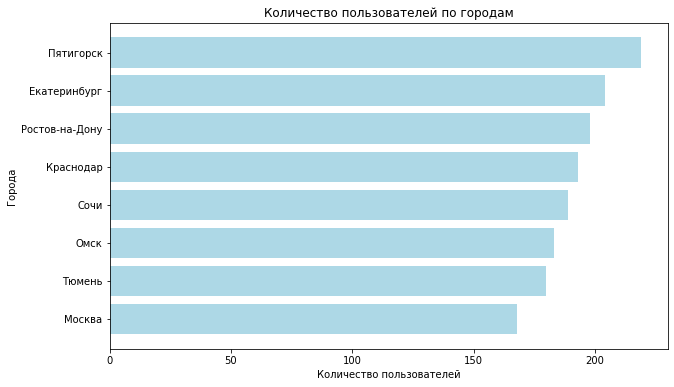

In [16]:
# создадим сводную таблицу и сортируем по количеству пользователей
users_counts = users_go.pivot_table(index='city', 
                                     values='user_id', 
                                     aggfunc='count').sort_values(by='user_id', ascending=True)

# построим горизонтальный барплот
plt.figure(figsize=(10, 6))
plt.barh(users_counts.index, users_counts['user_id'], color='lightblue')

plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.title('Количество пользователей по городам')

plt.show()

In [17]:
# создадим сводную таблицу
users_counts = users_go.pivot_table(index='city', 
                                 values='user_id', 
                                 aggfunc='count')
# сортируем значения 
sorted_users = users_counts.sort_values(by='user_id', ascending=False)
# посчитаем проценты
total_users = sorted_users['user_id'].sum()
sorted_users['percentage'] = (sorted_users['user_id']/total_users) * 100
sorted_users['percentage'] = sorted_users['percentage'].round(1)


display(sorted_users)

,user_id,percentage
city,,
Пятигорск,219,14.3
Екатеринбург,204,13.3
Ростов-на-Дону,198,12.9
Краснодар,193,12.6
Сочи,189,12.3
Омск,183,11.9
Тюмень,180,11.7
Москва,168,11.0


In [18]:
# посчитаем количество пользователей по городам и отобразим доли
sorted_users = (users_go['city'].value_counts(normalize=True) * 100).round(1)
sorted_users = sorted_users.rename("percentage")
display(sorted_users)

Пятигорск         14.3
Екатеринбург      13.3
Ростов-на-Дону    12.9
Краснодар         12.6
Сочи              12.3
Омск              11.9
Тюмень            11.7
Москва            11.0
Name: percentage, dtype: float64

Наблюдаем всего 8 городов. 

Больше всего пользователей в Пятигорске 14.3%, далее в Екатеринбурге 13.3%.

Не отстают по количеству пользователей в Ростове 12.9%, Краснодаре 12.6% и Сочи 12.3%.

Меньше всего пользователей из Москвы 11%.

##### Cоотношение пользователей с подпиской "ultra" и без подписки "free"

In [19]:
# создадим сводную таблицу
subscription_counts = users_go.pivot_table(index='subscription_type', 
                                         values='user_id', 
                                         aggfunc='count')
sorted_subscription = subscription_counts.sort_values(by='user_id', ascending=False)
# посчитаем проценты
total_users = subscription_counts['user_id'].sum()
subscription_counts['percentage'] = (subscription_counts['user_id'] / total_users) * 100
subscription_counts['percentage'] = subscription_counts['percentage'].round(1)

display(subscription_counts)

,user_id,percentage
subscription_type,,
free,835,54.4
ultra,699,45.6


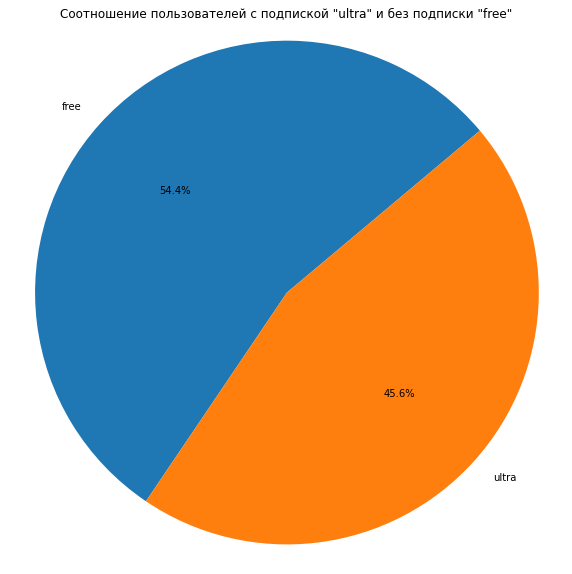

In [20]:
# создаем сводную таблицу
subscription_counts = users_go.pivot_table(index='subscription_type', 
                                         values='user_id', 
                                         aggfunc='count')
# построим круговую диаграмму
plt.figure(figsize=(10, 10))
plt.pie(subscription_counts['user_id'], 
         labels=subscription_counts.index, 
         autopct='%1.1f%%', 
         startangle=40)

plt.title('Соотношение пользователей с подпиской "ultra" и без подписки "free"')
plt.axis('equal') 
#plt.legend()

plt.show()

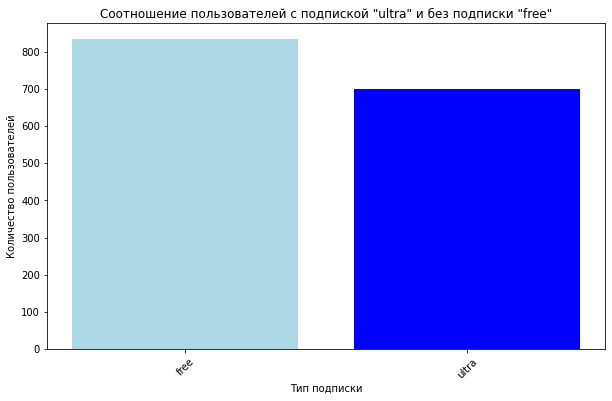

In [21]:
# создадим сводную таблицу
subscription_counts = users_go.pivot_table(index='subscription_type', 
                                         values='user_id', 
                                         aggfunc='count')
# построим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(subscription_counts.index, 
        subscription_counts['user_id'], 
        color=['lightblue', 'blue'])

plt.title('Соотношение пользователей с подпиской "ultra" и без подписки "free"')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')

plt.xticks(rotation=45)
plt.show()

54.4% пользователей предпочитают не покупать подписку, 45.6% пользователей покупают ежемесечную подписку.

##### Количество пользователей по возрастам

In [22]:
# посмотрим статистику
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

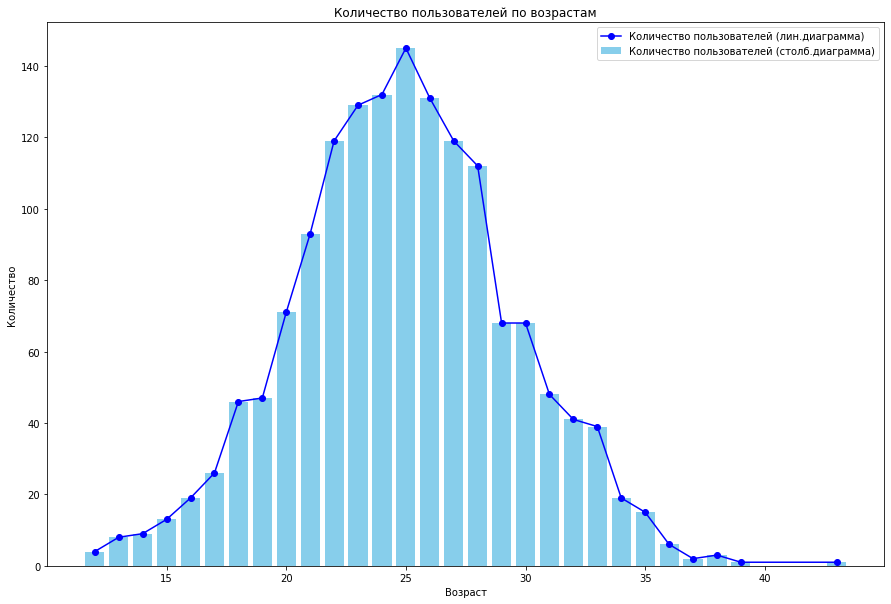

In [23]:
# создадим сводную таблицу и сортируем по возрасту
age_counts = users_go.pivot_table(index='age', 
                                 values='user_id', 
                                 aggfunc='count').sort_values(by='age')
# настроим график
plt.figure(figsize=(15, 10))

# построим столбчатую диаграмму
plt.bar(age_counts.index, age_counts['user_id'], 
        color='skyblue', 
        label='Количество пользователей (столб.диаграмма)')

# построим линейный график
plt.plot(age_counts.index, age_counts['user_id'], 
         marker='o', 
         color='blue', 
         label='Количество пользователей (лин.диаграмма)')

plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')

plt.legend()
plt.show()

Средний возраст пользователей услуги с медианой в 25 лет. Так же отметим, что в возрасте от 22 до 28 лет больше всего предпочитают пользоваться услугой.

##### Расстояние, которое пользователь преодолел за одну поездку

In [24]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

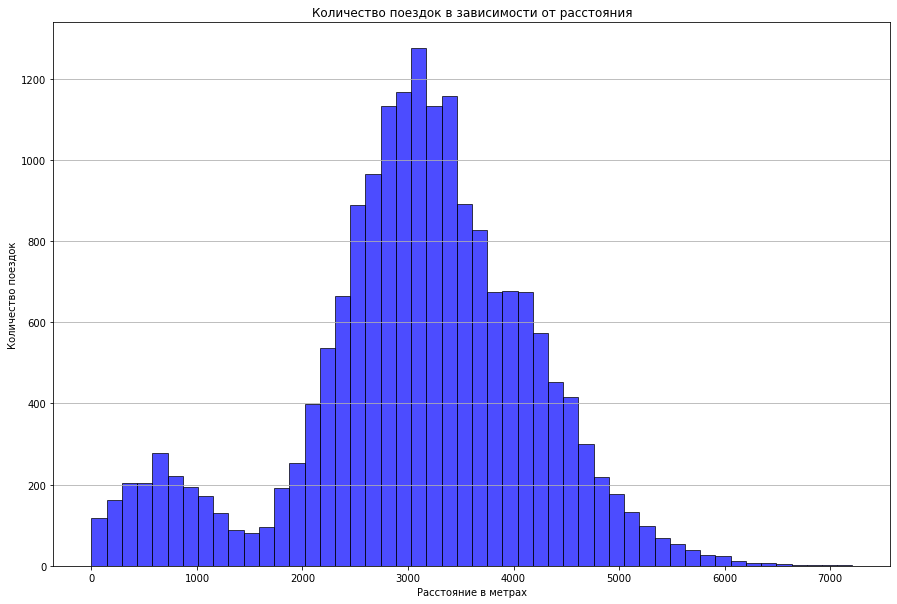

In [25]:
# пробовал построить линейный график - plt.plot, он не подходит - слишком шумный.
# построим гистограмму
plt.figure(figsize=(15, 10))
plt.hist(rides_go['distance'], 
         bins=50, 
         color='blue',
         edgecolor='black',
         alpha=0.7)

plt.title('Количество поездок в зависимости от расстояния')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')

plt.grid(axis='y')
plt.show()

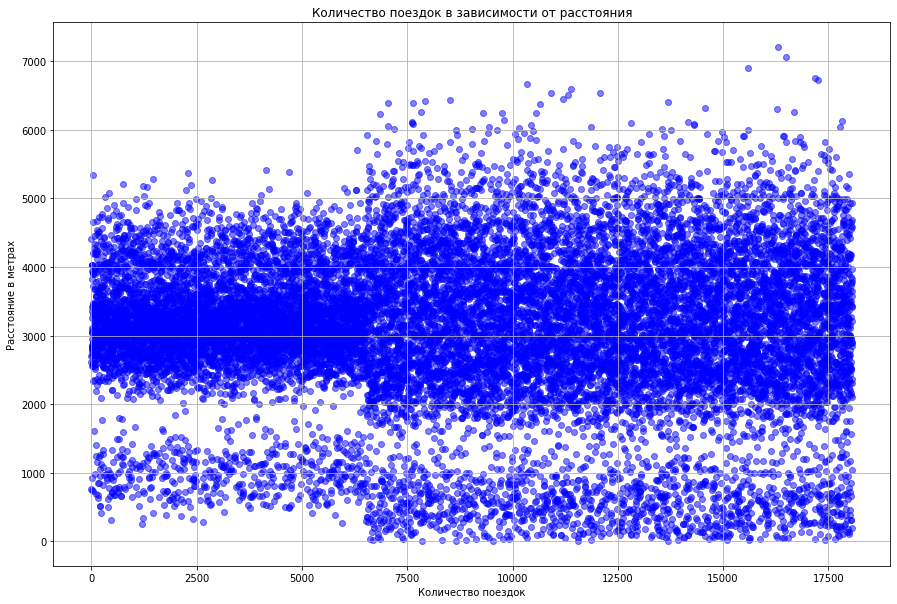

In [26]:
# построим точечный график
plt.figure(figsize=(15, 10))
plt.scatter(range(len(rides_go)), rides_go['distance'], alpha=0.5, color='blue')

plt.title('Количество поездок в зависимости от расстояния')
plt.xlabel('Количество поездок')
plt.ylabel('Расстояние в метрах')

plt.grid(True)
plt.show()

На графиках видно, что большинство поездок варьируется в пределах от 2500м до 3700м.
В среднем пользователь проезжает 3070м, по медиане они почти идентичны - 3133м.

##### Продолжительность поездок

In [27]:
rides_go['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

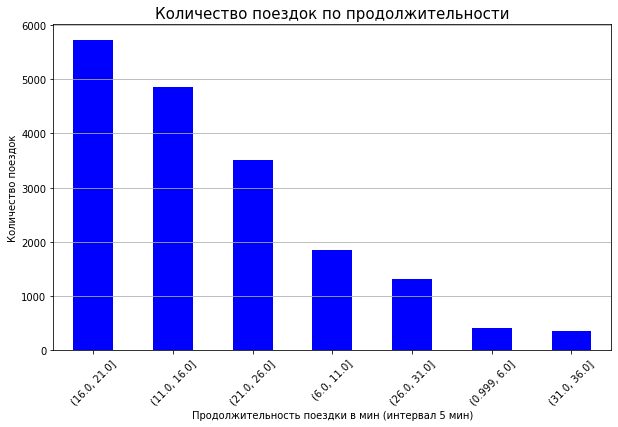

In [28]:
# построим столбчатую диаграмму
plt.figure(figsize=(10, 6))
rides_go['duration'].value_counts(bins=range(1, 41, 5)).plot(kind='bar', color='blue')

plt.title('Количество поездок по продолжительности', fontsize=15)
plt.xlabel('Продолжительность поездки в мин (интервал 5 мин)', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)

plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()

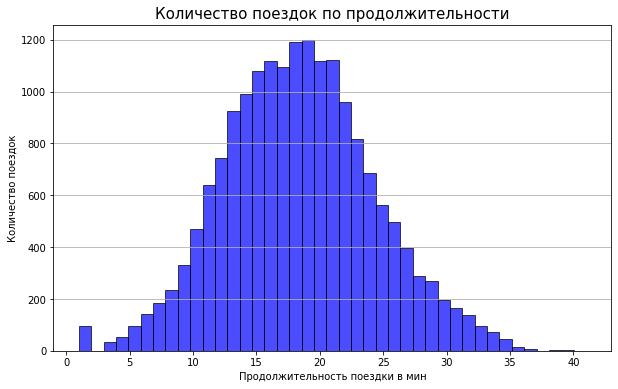

In [29]:
# построим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(rides_go['duration'], bins=41, range=(1, 41), color='blue', edgecolor='black', alpha=0.7)

plt.title('Количество поездок по продолжительности', fontsize=15)
plt.xlabel('Продолжительность поездки в мин', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)

plt.grid(axis='y')

plt.show()

Продолжительность поездок чаще всего, в среднем, занимает от 16 до 21мин. Самая долгая поездка была 41мин.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge()

In [30]:
data = (users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type'))

In [31]:
data.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  int64         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.8+ MB


Данные объеденены без потери данных.

##### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1: c данными о пользователях без подписки; с данными о пользователях с подпиской

In [33]:
data_free = data.query("subscription_type == 'free'")
data_ultra = data.query("subscription_type == 'ultra'")

In [34]:
data_free.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,айдар,22,Омск,free,2515.69,15,2021-01-02,1,8,50,0
6501,700,айдар,22,Омск,free,846.93,17,2021-02-01,2,8,50,0
6502,700,айдар,22,Омск,free,4004.43,21,2021-02-04,2,8,50,0
6503,700,айдар,22,Омск,free,1205.91,10,2021-02-10,2,8,50,0
6504,700,айдар,22,Омск,free,3047.38,18,2021-02-14,2,8,50,0


In [35]:
data_ultra.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


#####  Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

In [36]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [37]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

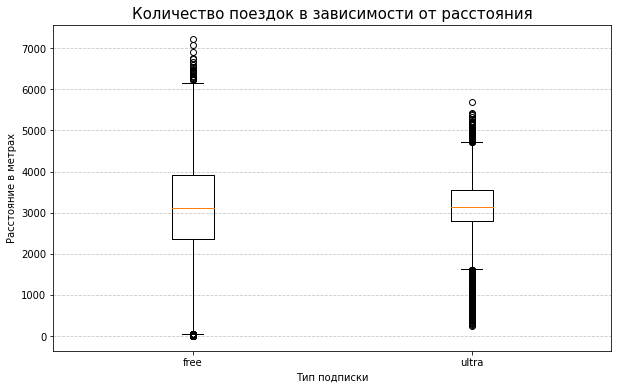

In [38]:
# построим ящик с усами
plt.figure(figsize=(10, 6))
plt.boxplot([data_free['distance'], data_ultra['distance']], labels=['free', 'ultra'])

plt.title('Количество поездок в зависимости от расстояния', fontsize=15)
plt.xlabel('Тип подписки', fontsize=10)
plt.ylabel('Расстояние в метрах', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
data_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [40]:
data_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

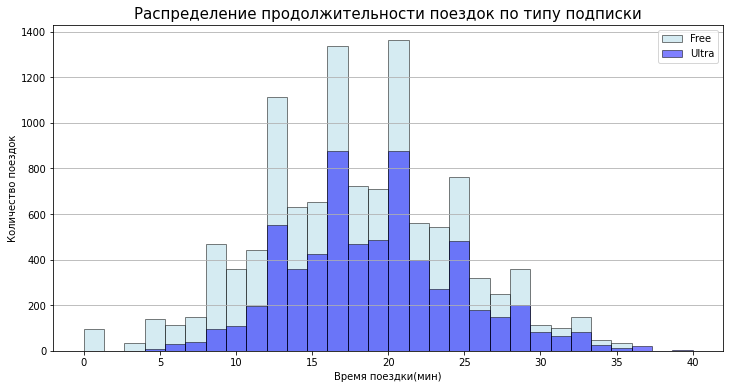

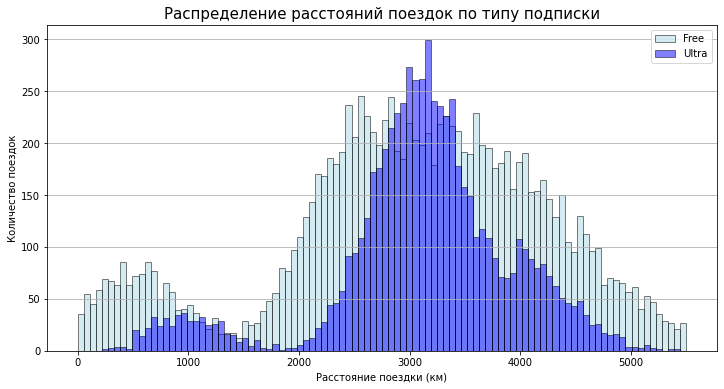

In [41]:
# построим гистограмму для распределения продолжительности поездок
plt.figure(figsize=(12, 6))
plt.hist(data_free['duration'], bins=30, range=(0, 40), 
         color='lightblue', alpha=0.5, label='Free', edgecolor='black')
plt.hist(data_ultra['duration'], bins=30, range=(0, 40), 
         color='blue', alpha=0.5, label='Ultra', edgecolor='black')

plt.title('Распределение продолжительности поездок по типу подписки', fontsize=15)
plt.xlabel('Время поездки(мин)', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)
plt.legend()
plt.grid(axis='y')

plt.show()

# построим гистограмму для распределения расстояний поездок
plt.figure(figsize=(12, 6))
plt.hist(data_free['distance'], bins=100, range=(0, 5500), 
         color='lightblue', alpha=0.5, label='Free', edgecolor='black')
plt.hist(data_ultra['distance'], bins=100, range=(0, 5500), 
         color='blue', alpha=0.5, label='Ultra', edgecolor='black')

plt.title('Распределение расстояний поездок по типу подписки', fontsize=15)
plt.xlabel('Расстояние поездки (км)', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)
plt.legend()
plt.grid(axis='y')

plt.show()

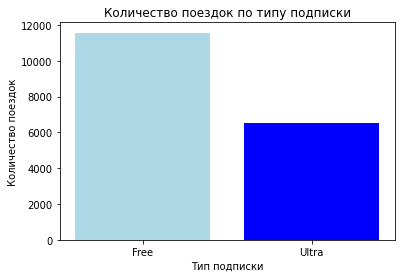

In [42]:
# построим столбчатый график
plt.bar(['Free', 'Ultra'], [data_free['duration'].count(), data_ultra['duration'].count()], color=['lightblue', 'blue'])

plt.title('Количество поездок по типу подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество поездок')

plt.show()

В зависимости от расстояния поездки: оба тарифа почти равны, по медианному значению free - 3114м, ultra - 3148м.

В зависимости от времени поездки: поездки от 13м до 22м чаще совершаются по бесплатному тарифу, по платному тарифу пользователь предпочитает ездить как на более длинные расстояния от 2.9км до 3.4км, так и на короткие от 500м до 1.5км

Видим пик около 0 - в основном были совершаны по бесплатному тарифу, возможно это сбой в программе или данные поездки были зарегистрированы и сразу отменены. 

Отметим, что пользователи по бесплатному тарифу, чаще, чем платному тарифу, совершают поездки на короткие расстояния до 1км.


#### Шаг 5. Подсчёт выручки

In [43]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [44]:
data_revenue = (
    data.groupby(['user_id', 'month', 'subscription_type'])
    .agg(count=('distance', 'count'),
         distance=('distance', 'sum'),
         duration=('duration', 'sum'),
         minute_price=('minute_price', 'mean'),
         start_ride_price=('start_ride_price', 'mean'),
         subscription_fee=('subscription_fee', 'mean'))
    .reset_index())

data_revenue.head()

,user_id,month,subscription_type,count,distance,duration,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,2,7027.51,42,6,0,199
1,1,4,ultra,1,754.16,7,6,0,199
2,1,8,ultra,2,6723.47,46,6,0,199
3,1,10,ultra,2,5809.91,32,6,0,199
4,1,11,ultra,3,7003.50,56,6,0,199


In [45]:
# Создаем столбец с выручкой
start_ride_revenue = data_revenue['start_ride_price'] * data_revenue['count']
minute_revenue = data_revenue['minute_price'] * data_revenue['duration']
subscription_revenue = data_revenue['subscription_fee']

data_revenue['revenue'] = start_ride_revenue + minute_revenue + subscription_revenue

data_revenue['revenue'].sum()

3878641

In [46]:
data['date'].min()

Timestamp('2021-01-01 00:00:00')

In [47]:
data['date'].max()

Timestamp('2021-12-30 00:00:00')

Выручка за 2021г. составила: 3 878 641.0 руб.

#### Шаг 6. Проверка гипотез

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

In [48]:
# Нулевая гипотеза: пользователи с подпиской ездят одинаково или меньше пользователей без подписки.
# Альтернативная гипотеза: пользователи с подпиской ездят дольше.

alpha = 0.05 # уровень статической значимости

results = st.ttest_ind(data_ultra['duration'], 
                       data_free['duration'], 
                       alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


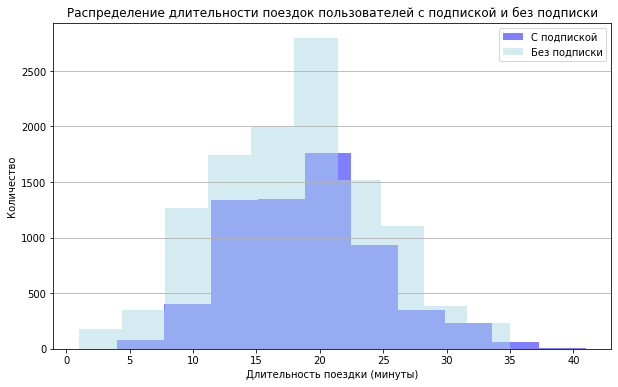

In [49]:
# построим гистограмму
plt.figure(figsize=(10, 6))

# для пользователей с подпиской
plt.hist(data_ultra['duration'], bins=10, alpha=0.5, label='С подпиской', color='blue')

# для пользователей без подписки
plt.hist(data_free['duration'], bins=10, alpha=0.5, label='Без подписки', color='lightblue')

plt.title('Распределение длительности поездок пользователей с подпиской и без подписки')
plt.xlabel('Длительность поездки (минуты)')
plt.ylabel('Количество')
plt.legend()
plt.grid(axis='y')
plt.show()

Поскольку p-value значительно меньше уровня статической значимости, нулевая гипотеза отвергнута.
Это означает, что есть достаточно статистических оснований полагать, что пользователи с подпиской действительно тратят больше времени на поездки, чем пользователи без подписки.

Пользователи с подпиской являются более выгодными для компании, так как они проводят больше времени в поездках. 

In [50]:
# Нулевая гипотеза: среднее расстояние с подпиской за одну поездку = 3130 метров.
# Альтернативная гипотеза: среднее расстояние с подпиской за одну поездку > 3130 метров.

distance = 3130

alpha = 0.05 # уровень статической значимости

results = st.ttest_1samp(data_ultra['distance'], 
                         distance, 
                         alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195362605842414
Не отвергаем нулевую гипотезу


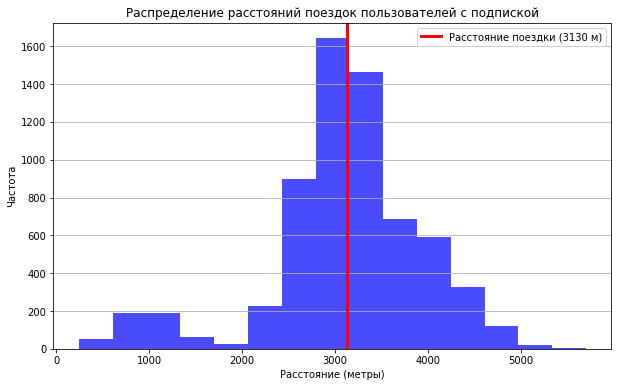

In [51]:
# построим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(data_ultra['distance'], bins=15, alpha=0.7, color='blue')

# добавим линию для определения расстояния
plt.axvline(distance, color='red', linewidth=3, label='Расстояние поездки (3130 м)')

plt.title('Распределение расстояний поездок пользователей с подпиской')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y')
plt.show()

Поскольку p-value значительно больше уровня значимости, нулевая гипотеза не отвергнута.
Это означает, что нет достаточных статистических оснований для утверждения, что среднее расстояние поездок с подпиской превышает 3130 метров.

Пользователи с подпиской, в среднем, не ездят дальше 3130 метров за одну поездку.

In [52]:
# Нулевая гипотеза: выручка от пользователей с подпиской меньше или равна выручке от пользователей без подписки
# Альтернативная гипотеза: выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

alpha = 0.05 # уровень статической значимости

results = st.ttest_ind(data_revenue.loc[data_revenue['subscription_fee'] > 0, 'revenue'], 
                       data_revenue.loc[data_revenue['subscription_fee'] == 0, 'revenue'], 
                       alternative='greater')
print(results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


1.8850394384715216e-31
Отвергаем нулевую гипотезу


<Figure size 1080x576 with 0 Axes>

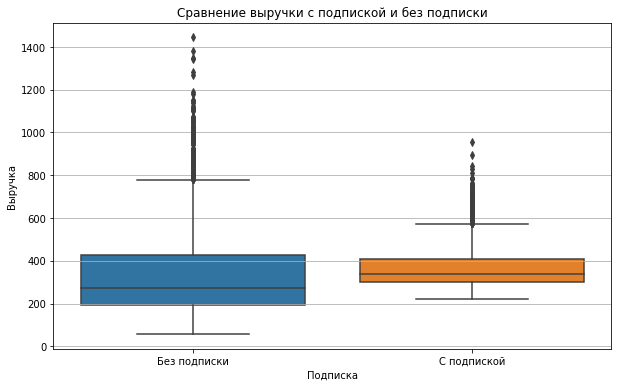

In [53]:
plt.figure(figsize=(15, 8))

# создадим ящик с усами
plt.figure(figsize=(10, 6))
sbn.boxplot(x='subscription_fee', y='revenue', data=data_revenue)

plt.title('Сравнение выручки с подпиской и без подписки')
plt.xlabel('Подписка')
plt.xticks([0, 1], ['Без подписки', 'С подпиской'])
plt.ylabel('Выручка')
plt.grid(axis='y')
plt.show()

Поскольку p-value меньше уровня значимости, нулевая гипотеза отвергнута.
Это указывает на то, что выручка от пользователей с подпиской статистически значимо выше, чем у пользователей без подписки.

Пользователи с ежемесячной подпиской более активно используют сервис, так как медианное значение выше, что, в свою очередь, способствует увеличению выручки компании.

**Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Получается так: у нас есть данные о количестве обращений в техподдержку для каждого пользователя до обновления и после него. То есть, есть две связанные выборки (одни и те же пользователи, но, в разные временные интервалы).

Для проверки гипотезы можно использовать парный t-тест: st.ttest_rel (from scipy import stats as st).

#### Шаг 7. Распределения

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 
100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Минимальное количество клиентов, которое нужно для достижения уровня значимости: 1161


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


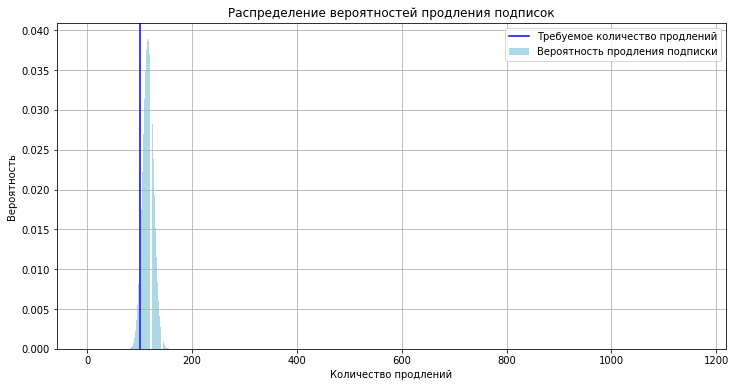

In [54]:
p = 0.1  # вероятность продления подписки
k = 100   # требуемое количество продлений
alpha = 0.05  # уровень значимости

n = 100  # минимум существующих клиентов
while True:
    if binom.cdf(k - 1, n, p) < alpha:  # k - 1, ищем меньше 100
        break
    n += 1

print(f"Минимальное количество клиентов, которое нужно для достижения уровня значимости: {n}")

# создадим данные для распределения
x = np.arange(0, n + 1)  # возможные значения
pmf = binom.pmf(x, n, p)  # вероятность для каждого значения

# построим график распределения
plt.figure(figsize=(12, 6))
plt.bar(x, pmf, color='lightblue', label='Вероятность продления подписки')
plt.axvline(x=k, color='blue', linestyle='-', label='Требуемое количество продлений')
plt.title('Распределение вероятностей продления подписок')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.show()

Минимальное количество промокодов, которое нужно разослать: 1161, чтобы достичь желаемого результата.

#### Вывод:

**Загрузили данные:**

users - 1565 записи, пропуски отсутствуют, количество явных дубликатов 31.

users_go - 18068 записи, пропуски отсутствуют, явных дубликатов нет.

subscriptions_go - 2 записи, пропуски отсутствуют, явных дубликатов нет.


**Предобработка данных:**

Удалили дубликаты в датафрейме users_go. Привели к единому регистру и удалили пробелы.

Привели столбец date к типу datetime64.

Округлили distance в метрах до двух знаков после запятой

Округлили каждое значение из столбца duration.

Создали столбец month с номером месяца из date.

**Ислледовательский анализ данных:**

Больше всего пользователей в Пятигорске 14.3%, далее в Екатеринбурге 13.3%.

Не отстают по количеству пользователей в Ростове 12.9%, Краснодаре 12.6% и Сочи 12.3%.

Меньше всего пользователей из Москвы 11%.

54.4% предпочитают не покупать подписку, 45.6% покупают ежемесечную подписку.

Средний возраст пользователей услуги с медианой в 25 лет. Так же отметим, что в возрасте от 22 до 28 лет больше всего предпочитают пользоваться услугой.

На графиках видно, что большинство поездок варьируется в пределах от 2500м до 3700м.
В среднем пользователь проезжает 3070м, по медиане они почти идентичны - 3133м.

Продолжительность поездок чаще всего, в среднем, занимает от 16 до 21мин. Самая долгая поездка была 41мин.

**Объединение данных (объединили данные о пользователях, поездках и подписках в один датафрейм):**

В зависимости от расстояния поездки: оба тарифа почти равны, по медианному значению free - 3114м, ultra - 3148м.

В зависимости от времени поездки: поездки от 13м до 22м чаще совершаются по бесплатному тарифу, по платному тарифу пользователь предпочитает ездить как на более длинные расстояния от 2.9км до 3.4км, так и на короткие от 500м до 1.5км

Видим пик около 0 - в основном были совершаны по бесплатному тарифу, возможно это сбой в программе или данные поездки были зарегистрированы и сразу отменены. 

Отметим, что пользователи по бесплатному тарифу, чаще, чем платному тарифу, совершают поездки на короткие расстояния до 1км.


**Подсчет выручки:**

Выручка за 2021г. составила: 3 878 641.0 руб.

**Проверка гипотез**

Пользователи с подпиской являются более выгодными для компании, так как они проводят больше времени в поездках. 

Пользователи с подпиской, в среднем, не ездят дальше 3130 метров за одну поездку.

Пользователи с ежемесячной подпиской более активно используют сервис, так как медианное значение выше, что, в свою очередь, способствует увеличению выручки компании.

Данные результаты могут быть использованы для дальнейшей оптимизации услуг существующих клиентов с подпиской. 
